# DBTL 7 data analysis

This notebook analyzes OD340 data from DBTL cycle 7 of a flaviolin producing P. putida.

## Inputs and outputs

#### Required file to run this notebook:
   - edd slug


#### File generated by running this notebook:
   
 
    
The files are stored in the user defined directory.

## Setup

Importing needed libraries:

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from sklearn.metrics import r2_score

import edd_utils as eddu

In [2]:
from art.core import *
# import art.plot as plot

/usr/local/art/.venv/lib/python3.11/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
pwd

'/code/flaviolin_yield_notebooks_final'

### User parameters

In [4]:
CYCLE = 3

user_params = {
    'output_file_path': f'../flaviolin yield data/DBTL{CYCLE}', # Folder for output files,
    'bounds_file': f'../flaviolin yield data/Putida_media_bounds_extended.csv',
    'study_slug': 'flav_c3_dbtl3',
    'edd_server': 'public-edd.jbei.org',
    'username': '<YOURUSERNAMEHERE>',
    } 

In [5]:
study_slug = user_params['study_slug']
edd_server = user_params['edd_server']
username = user_params['username']

## Load the study

In [6]:
try:
  session = eddu.login(edd_server=edd_server, user=username)
except:
  print('ERROR! Connection to EDD failed. We will try to load data from disk...')
else:
  print('OK! Connection to EDD successful. We will try to load data from EDD...')

Password for azournas:  ········


OK! Connection to EDD successful. We will try to load data from EDD...


In [7]:
df: pd.DataFrame
    
try:
    df = eddu.export_study(session, study_slug, edd_server=edd_server)
except (NameError, AttributeError, KeyError):
    try:
        df = pd.read_csv(user_params['study_file'])
    except:
        print(f'ERROR! Alternative loading of data from disk failed!')
    else:
        print(f'OK! Alternative loading of data from disk was successful.')


  0%|          | 0/48 [00:00<?, ?it/s]

In [8]:
df.head()

,Study ID,Study Name,Line ID,Replicate Key,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,208609,Combinatorial Media Optimization for Flaviolin...,208610,e7e42860-b795-4375-ae41-296480c4c347,C3_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,208658,C3_WA1_C1-R1,NaN,OD340,0,NaN,0.3358,48.0
1,208609,Combinatorial Media Optimization for Flaviolin...,208611,a91bdd82-1e8d-4767-b553-e00905545cd8,C3_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,208659,C3_WA1_C1-R2,NaN,OD340,0,NaN,0.3408,48.0
2,208609,Combinatorial Media Optimization for Flaviolin...,208612,b605d005-a15b-4848-a68b-ff15382cadaf,C3_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,208660,C3_WA1_C1-R3,NaN,OD340,0,NaN,0.3575,48.0
3,208609,Combinatorial Media Optimization for Flaviolin...,208613,63404796-0639-49f8-a1ac-56bf930aad3e,C3_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,208661,C3_WD1_F1-R1,NaN,OD340,0,NaN,0.6465,48.0
4,208609,Combinatorial Media Optimization for Flaviolin...,208614,00c64e59-9e15-473e-b0ba-70e31d4ecc9a,C3_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,208662,C3_WD1_F1-R2,NaN,OD340,0,NaN,0.6351,48.0


Drop unnecessary columns:

In [9]:
df = df.loc[:,['Line Name','Line Description','Measurement Type','Value']]
df.head()

,Line Name,Line Description,Measurement Type,Value
0,C3_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3358
1,C3_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3408
2,C3_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3575
3,C3_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6465
4,C3_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6351


In [10]:
df

,Line Name,Line Description,Measurement Type,Value
0,C3_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3358
1,C3_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3408
2,C3_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3575
3,C3_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6465
4,C3_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6351
5,C3_WD1_F1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6512
6,C3_WA2_C2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.2620
7,C3_WA2_C2-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3022
8,C3_WA2_C2-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3017
9,C3_WD2_F2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.4300


In [11]:
import re
df['OD340yield'] = df['Value']/df['Line Description'].str.extract(r'Glucose\[mM\]: (\d+\.\d+)', expand=False).astype(float)


In [12]:
find_col = lambda x: x['Line Name'][5]

def find_row(row):
    line_name = row['Line Name']
    if line_name[4] == 'A':
        if int(line_name[-1]) == 1:
            return "A"
        elif int(line_name[-1]) == 2:
            return "B"
        else:
            return "C"
    else:
        if int(line_name[-1]) == 1:
            return "D"
        elif int(line_name[-1]) == 2:
            return "E"
        else:
            return "F"


In [13]:
df['Row'] =  df.apply(find_row, axis=1)
df['Column'] =  df.apply(find_col, axis=1)


## Coefficient of variation

In [14]:
df_red = df.drop(columns=['Column'])
stats_mean = df_red.groupby(['Measurement Type', 'Line Description'])['Value'].mean().reset_index()
stats_mean.rename(columns={'Value': 'mean'}, inplace=True)
stats_std = df_red.groupby(['Measurement Type', 'Line Description'])['Value'].std().reset_index()
stats_std.rename(columns={'Value': 'std'}, inplace=True)
stats = pd.merge(stats_mean, stats_std, on=['Measurement Type', 'Line Description'])
stats['CV[%]'] = 100 * stats['std'] / stats['mean']
stats.head(16)

,Measurement Type,Line Description,mean,std,CV[%]
0,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.344700,0.011364,3.296646
1,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.194767,0.001405,0.721250
2,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.177967,0.004817,2.706678
3,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.318867,0.017993,5.642756
4,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.120933,0.004748,3.926115
5,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.288633,0.023066,7.991627
6,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.644267,0.008279,1.285041
7,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.268767,0.008298,3.087359
8,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.113633,0.004336,3.816029
9,OD340,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.000100,0.000000,0.000000


In [15]:
print("Mean coefficient of variation for OD340:")
np.mean(stats['CV[%]'])

Mean coefficient of variation for OD340:


2.9756849931999065

## Visualization

/tmp/ipykernel_32326/2381843101.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df,


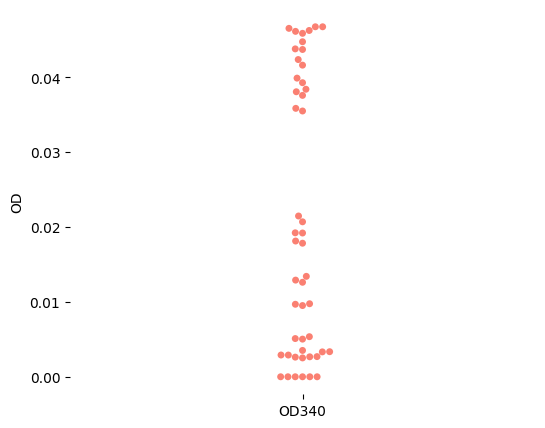

In [16]:
fig, ax = plt.subplots(figsize=(6, 5))
fontsize = 16
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
sns.swarmplot(data=df, 
              linewidth=0,
              x='Measurement Type',
              y='OD340yield',
              palette="dark:salmon_r"
              )
sns.despine(left=True, bottom=True)
ax.set(xlabel=None, ylabel="OD")

fig.savefig(
    f"{user_params['output_file_path']}/swarm_both.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

Per line:

In [17]:
line_names = []
df_340 = df[df['Measurement Type']=='OD340'].reset_index()
for i in range(int(len(df_340)/3)):
    line_names.append(str(df_340['Line Name'][3*i])[3:-3])
# line_names

/tmp/ipykernel_32326/3466474275.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(line_names, fontsize=8, rotation = 30)


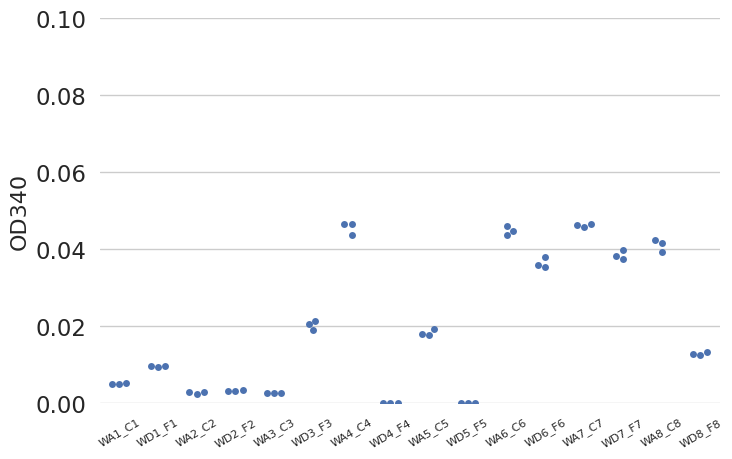

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))
fontsize = 14
sns.set_style("whitegrid")
g = sns.swarmplot(data=df, 
              linewidth=0,
              x='Line Description',
              y='OD340yield',
              # hue='Measurement Type',
              # palette="dark:salmon_r",
              )
g.set_xticklabels(line_names, fontsize=8, rotation = 30)
# plt.legend(fontsize=fontsize)
sns.despine(left=True, bottom=True)
ax.set_ylabel("OD340", fontsize=fontsize+2)
ax.set_xlabel(None)
plt.ylim([0, 0.1])

fig.savefig(
    f"{user_params['output_file_path']}/swarm_per_design.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

### Plot OD measurements per well

In [19]:
df[df['Measurement Type']=='OD340']

,Line Name,Line Description,Measurement Type,Value,OD340yield,Row,Column
0,C3_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3358,5.030692e-03,A,1
1,C3_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3408,5.105599e-03,B,1
2,C3_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3575,5.355785e-03,C,1
3,C3_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6465,9.685300e-03,D,1
4,C3_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6351,9.514515e-03,E,1
5,C3_WD1_F1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6512,9.755712e-03,F,1
6,C3_WA2_C2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.2620,2.520783e-03,A,2
7,C3_WA2_C2-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3022,2.907560e-03,B,2
8,C3_WA2_C2-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3017,2.902749e-03,C,2
9,C3_WD2_F2-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.4300,3.518404e-03,D,2


In [20]:
def get_sample(x):
    return x['Line Name'][:-3]
def get_rep(x):
    return x['Line Name'][-2:]

In [21]:
df['Sample'] = df.apply(get_sample, axis = 1)
df['Replicate'] = df.apply(get_rep, axis = 1)
df.head()

,Line Name,Line Description,Measurement Type,Value,OD340yield,Row,Column,Sample,Replicate
0,C3_WA1_C1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3358,0.005031,A,1,C3_WA1_C1,R1
1,C3_WA1_C1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3408,0.005106,B,1,C3_WA1_C1,R2
2,C3_WA1_C1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.3575,0.005356,C,1,C3_WA1_C1,R3
3,C3_WD1_F1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6465,0.009685,D,1,C3_WD1_F1,R1
4,C3_WD1_F1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.6351,0.009515,E,1,C3_WD1_F1,R2


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'C3_WA1_C1'),
  Text(1, 0, 'C3_WA2_C2'),
  Text(2, 0, 'C3_WA3_C3'),
  Text(3, 0, 'C3_WA4_C4'),
  Text(4, 0, 'C3_WA5_C5'),
  Text(5, 0, 'C3_WA6_C6'),
  Text(6, 0, 'C3_WA7_C7'),
  Text(7, 0, 'C3_WA8_C8'),
  Text(8, 0, 'C3_WD1_F1'),
  Text(9, 0, 'C3_WD2_F2'),
  Text(10, 0, 'C3_WD3_F3'),
  Text(11, 0, 'C3_WD4_F4'),
  Text(12, 0, 'C3_WD5_F5'),
  Text(13, 0, 'C3_WD6_F6'),
  Text(14, 0, 'C3_WD7_F7'),
  Text(15, 0, 'C3_WD8_F8')])

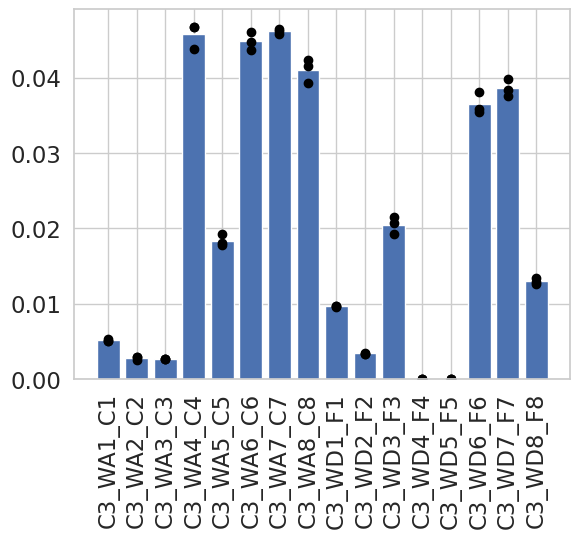

In [22]:
# result = df.groupby('Sample').agg({'Value': ['mean', 'min', 'max', 'std', 'median']}) 
def get_sample(x):
    return x['Line Name'][:-3]
def get_rep(x):
    return x['Line Name'][-2:]

df['Sample'] = df.apply(get_sample, axis = 1)
df['Replicate'] = df.apply(get_rep, axis = 1)
result = df.groupby('Sample')
result['Value'].head()
# result['Value'].plot(kind = 'bar', y = 'mean', yerr = 'std')

result = df[df['Measurement Type']=='OD340'].pivot(index = 'Sample', columns = 'Replicate',values = 'OD340yield')
result['mean'] = result.mean(axis = 1)
result.head()
fig, ax = plt.subplots()
ax.bar(result.index, result['mean'])
ax.scatter(result.index, result.loc[:,['R1']], color = 'black')
ax.scatter(result.index, result.loc[:,['R2']], color = 'black')
ax.scatter(result.index, result.loc[:,['R3']], color = 'black')
plt.xticks(rotation=90)
# result.index
# result[['R1','R2','R3']].values

In [23]:
data_od340yield = df[df['Measurement Type']=='OD340'].pivot(index = 'Row', columns = 'Column',values = 'OD340yield')

In [24]:
data_od340yield.head(6)

Column,1,2,3,4,5,6,7,8
Row,,,,,,,,
A,0.005031,0.002521,0.002694,4.674691e-02,1.922882e-02,0.043714,0.045873,0.041622
B,0.005106,0.002908,0.002624,4.674691e-02,1.783995e-02,0.046134,0.046253,0.042370
C,0.005356,0.002903,0.002669,4.379447e-02,1.813162e-02,0.044748,0.046537,0.039278
D,0.009685,0.003518,0.021475,6.115259e-07,7.995490e-07,0.038067,0.039889,0.012912
E,0.009515,0.003326,0.020698,6.115259e-07,7.995490e-07,0.035500,0.038404,0.013414
F,0.009756,0.003351,0.019203,6.115259e-07,7.995490e-07,0.035853,0.037584,0.012622


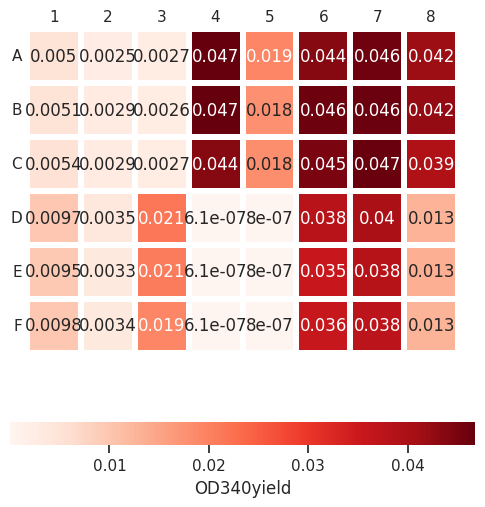

In [25]:
fig = plt.figure(figsize=(10,6))
colormap = sns.color_palette("light:salmon", as_cmap=True)
colormap = "Reds"
sns.set_context("notebook", font_scale=1., rc={"lines.linewidth": 2.5})
ax = sns.heatmap(data_od340yield, 
                 linewidths=3, 
                 linecolor="w",
                 square= True,
                 cmap=colormap,
                 cbar_kws={"orientation": "horizontal",
                           "shrink": 0.6,
                           'label': 'OD340yield'
                          },
                 annot = True,
                )
ax.set(xlabel=None, ylabel=None)
plt.yticks(rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.xaxis.tick_top()
fig.savefig(
    f"{user_params['output_file_path']}/OD340.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

### Load training data and predictions for recommendations:

In [26]:
user_params['target_designs'] = f"{user_params['output_file_path']}/target_concentrations.csv"

In [27]:
designs_pred = pd.read_csv(user_params['target_designs'], index_col=0).reset_index()
designs_pred.drop(columns='Well', inplace=True)
designs_pred['OD340yield'] = df[df['Measurement Type']=='OD340']['OD340yield'].values
designs_pred

,H3BO3[mM],Glucose[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM],OD340yield_pred,OD340yield_std,Label,OD340yield
0,0.000400,66.750254,1.920390,6.422140,0.100000,14.059542,0.052000,497.923422,0.000300,0.003000,0.001000,0.008000,0.000010,0.010839,0.005574,explore,5.030692e-03
1,0.000400,66.750254,1.920390,6.422140,0.100000,14.059542,0.052000,497.923422,0.000300,0.003000,0.001000,0.008000,0.000010,0.010839,0.005574,explore,5.105599e-03
2,0.000400,66.750254,1.920390,6.422140,0.100000,14.059542,0.052000,497.923422,0.000300,0.003000,0.001000,0.008000,0.000010,0.010839,0.005574,explore,5.355785e-03
3,0.003116,66.750641,1.895454,6.438428,0.097366,14.030724,0.199599,497.920272,0.000294,0.002793,0.000695,0.005900,0.000027,0.010426,0.005346,explore,9.685300e-03
4,0.003116,66.750641,1.895454,6.438428,0.097366,14.030724,0.199599,497.920272,0.000294,0.002793,0.000695,0.005900,0.000027,0.010426,0.005346,explore,9.514515e-03
5,0.003116,66.750641,1.895454,6.438428,0.097366,14.030724,0.199599,497.920272,0.000294,0.002793,0.000695,0.005900,0.000027,0.010426,0.005346,explore,9.755712e-03
6,0.002521,103.935952,1.574595,5.002460,0.096235,13.352076,0.058269,496.724740,0.000280,0.002802,0.000924,0.005394,0.000255,0.009363,0.005321,explore,2.520783e-03
7,0.002521,103.935952,1.574595,5.002460,0.096235,13.352076,0.058269,496.724740,0.000280,0.002802,0.000924,0.005394,0.000255,0.009363,0.005321,explore,2.907560e-03
8,0.002521,103.935952,1.574595,5.002460,0.096235,13.352076,0.058269,496.724740,0.000280,0.002802,0.000924,0.005394,0.000255,0.009363,0.005321,explore,2.902749e-03
9,0.014431,122.214511,0.216991,2.382060,0.099725,11.781273,0.741833,496.502531,0.000293,0.002968,0.000997,0.004588,0.000611,0.008289,0.005240,explore,3.518404e-03


In [28]:
user_params['train_data'] = f'../flaviolin yield data/DBTL{CYCLE}/train_pred.csv'

In [29]:
train_pred = pd.read_csv(user_params['train_data'], index_col=0)
train_pred['Label'].unique()

array(['train', 'standard'], dtype=object)

In [34]:
def predictions_vs_observations(
    designs,
    train,
    errorbars_flag=True,
    xlim=None,
    ylim=None,
):
    
    plt.style.use("seaborn-v0_8-white")

    fontsize = 20

    fig, ax = plt.subplots(figsize=(7, 7))
    
    obs_all = np.append(train['OD340yield'], designs['OD340yield'])
    pred_all = np.append(train['OD340yield_cv_pred'], designs['OD340yield_pred'])
    pred_std_all = np.append(train['OD340yield_cv_std'], designs['OD340yield_std'])
   
    
    # Plot Scatter Plot
    if errorbars_flag:
        plt.errorbar(
            obs_all,
            pred_all,
            yerr=1.96 * pred_std_all,
            fmt='none',
            ecolor="lightgray",
            elinewidth=1,
            alpha=0.5,
            zorder=0
        )
            
    plt.scatter(
        train['OD340yield'], 
        train['OD340yield_cv_pred'], 
        color="gray",
        label='train'
    )

    # standard = train[train['Label']=='standard']
    # # print('standard')
    # # print(standard)
    # plt.scatter(
    #     standard['OD340'], 
    #     standard['OD340_pred'],
    #     label='standard',
    #     color="k"
    # )
    
    standard_des = designs[designs['Label']=='standard']
    plt.scatter(standard_des['OD340yield'], 
                standard_des['OD340yield_pred'], 
                color="k",
                label = 'standard')
    
    exploit_des = designs[designs['Label']=='exploit']
    # print('exploit')
    # print(exploit_des)
    plt.scatter(
        exploit_des['OD340yield'], 
        exploit_des['OD340yield_pred'], 
        color="r",
        label='exploitation'
    )
    
    explore_des = designs[designs['Label']=='explore']
    # print('explore')
    # print(explore_des)
    plt.scatter(
        explore_des['OD340yield'], 
        explore_des['OD340yield_pred'], 
        color="orange",
        label='exploration'
    )
    
    r2_train = round(r2_score(train['OD340yield'], train['OD340yield_cv_pred']), 2)
    
    r2_all = round(r2_score(obs_all, pred_all), 2)

    ax.set_title(f"$R^2$={r2_train}", fontsize=fontsize)
    
    print(f"$R^2$={r2_all}")
    ax.set_xlabel("Observations", fontsize=fontsize)
    ax.set_ylabel("Cross-validation predictions", fontsize=fontsize)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    if xlim is None:
        ax.set_xlim(lims)
    else:
        ax.set_xlim(xlim)

    if ylim is None:
        ax.set_ylim(lims)
    else:
        ax.set_ylim(ylim)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # Plot Diagonal Dashed Line
    ax.plot(lims, lims, ls="--", color=".8", zorder=0)
    
    plt.legend(loc='best', 
               fontsize=fontsize-4)

    plt.tick_params(axis="both", which="major", labelsize=fontsize)
    plt.show()

    fig.savefig(
        user_params['output_file_path']
        + "/predictions_vs_observations.png",
        bbox_inches="tight",
        transparent=False,
        dpi=300,
    )

    plt.close(fig)

In [35]:
designs_pred.tail()


,H3BO3[mM],Glucose[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM],OD340yield_pred,OD340yield_std,Label,OD340yield
43,0.002504,2.943125,1.481084,4.942215,0.093911,8.133338,1.145048,461.821354,0.000256,0.001953,0.001000,0.003047,0.000122,0.038218,0.004950,exploit,0.042370
44,0.002504,2.943125,1.481084,4.942215,0.093911,8.133338,1.145048,461.821354,0.000256,0.001953,0.001000,0.003047,0.000122,0.038218,0.004950,exploit,0.039278
45,0.004040,20.702191,0.284786,1.195734,0.009621,8.606283,0.477038,50.425498,0.000030,0.000278,0.000097,0.000765,0.000105,0.012344,0.004526,standard,0.012912
46,0.004040,20.702191,0.284786,1.195734,0.009621,8.606283,0.477038,50.425498,0.000030,0.000278,0.000097,0.000765,0.000105,0.012344,0.004526,standard,0.013414
47,0.004040,20.702191,0.284786,1.195734,0.009621,8.606283,0.477038,50.425498,0.000030,0.000278,0.000097,0.000765,0.000105,0.012344,0.004526,standard,0.012622


In [36]:
train_pred.tail()

,H3BO3[mM],Glucose[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM],OD340,OD340yield,OD340yield_pred,OD340yield_std,OD340yield_cv_pred,OD340yield_cv_std,Label
91,0.001576,10.077184,0.036933,6.538513,0.008999,7.031522,0.250629,9.100841,0.000005,0.000068,0.0001,0.0008,0.0001,0.1332,0.013218,0.014064,0.004526,0.021609,0.005823,train
92,0.001576,10.077184,0.036933,6.538513,0.008999,7.031522,0.250629,9.100841,0.000005,0.000068,0.0001,0.0008,0.0001,0.1453,0.014419,0.014064,0.004526,0.021609,0.005823,train
93,0.004091,19.348252,0.300440,1.399625,0.009412,9.987207,0.525179,53.652264,0.000030,0.000276,0.0001,0.0008,0.0001,0.2575,0.013309,0.012423,0.004524,0.012960,0.006057,standard
94,0.004091,19.348252,0.300440,1.399625,0.009412,9.987207,0.525179,53.652264,0.000030,0.000276,0.0001,0.0008,0.0001,0.2234,0.011546,0.012423,0.004524,0.012960,0.006057,standard
95,0.004091,19.348252,0.300440,1.399625,0.009412,9.987207,0.525179,53.652264,0.000030,0.000276,0.0001,0.0008,0.0001,0.2387,0.012337,0.012423,0.004524,0.012960,0.006057,standard


$R^2$=0.82


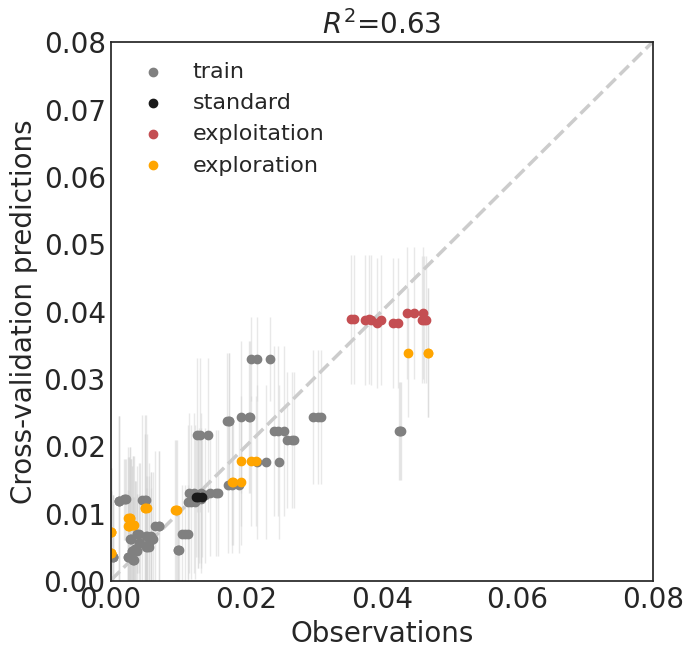

In [37]:
predictions_vs_observations(
    designs=designs_pred,
    train=train_pred,
    errorbars_flag=True,
    xlim=[0, .08],
    ylim=[0, .08],
)